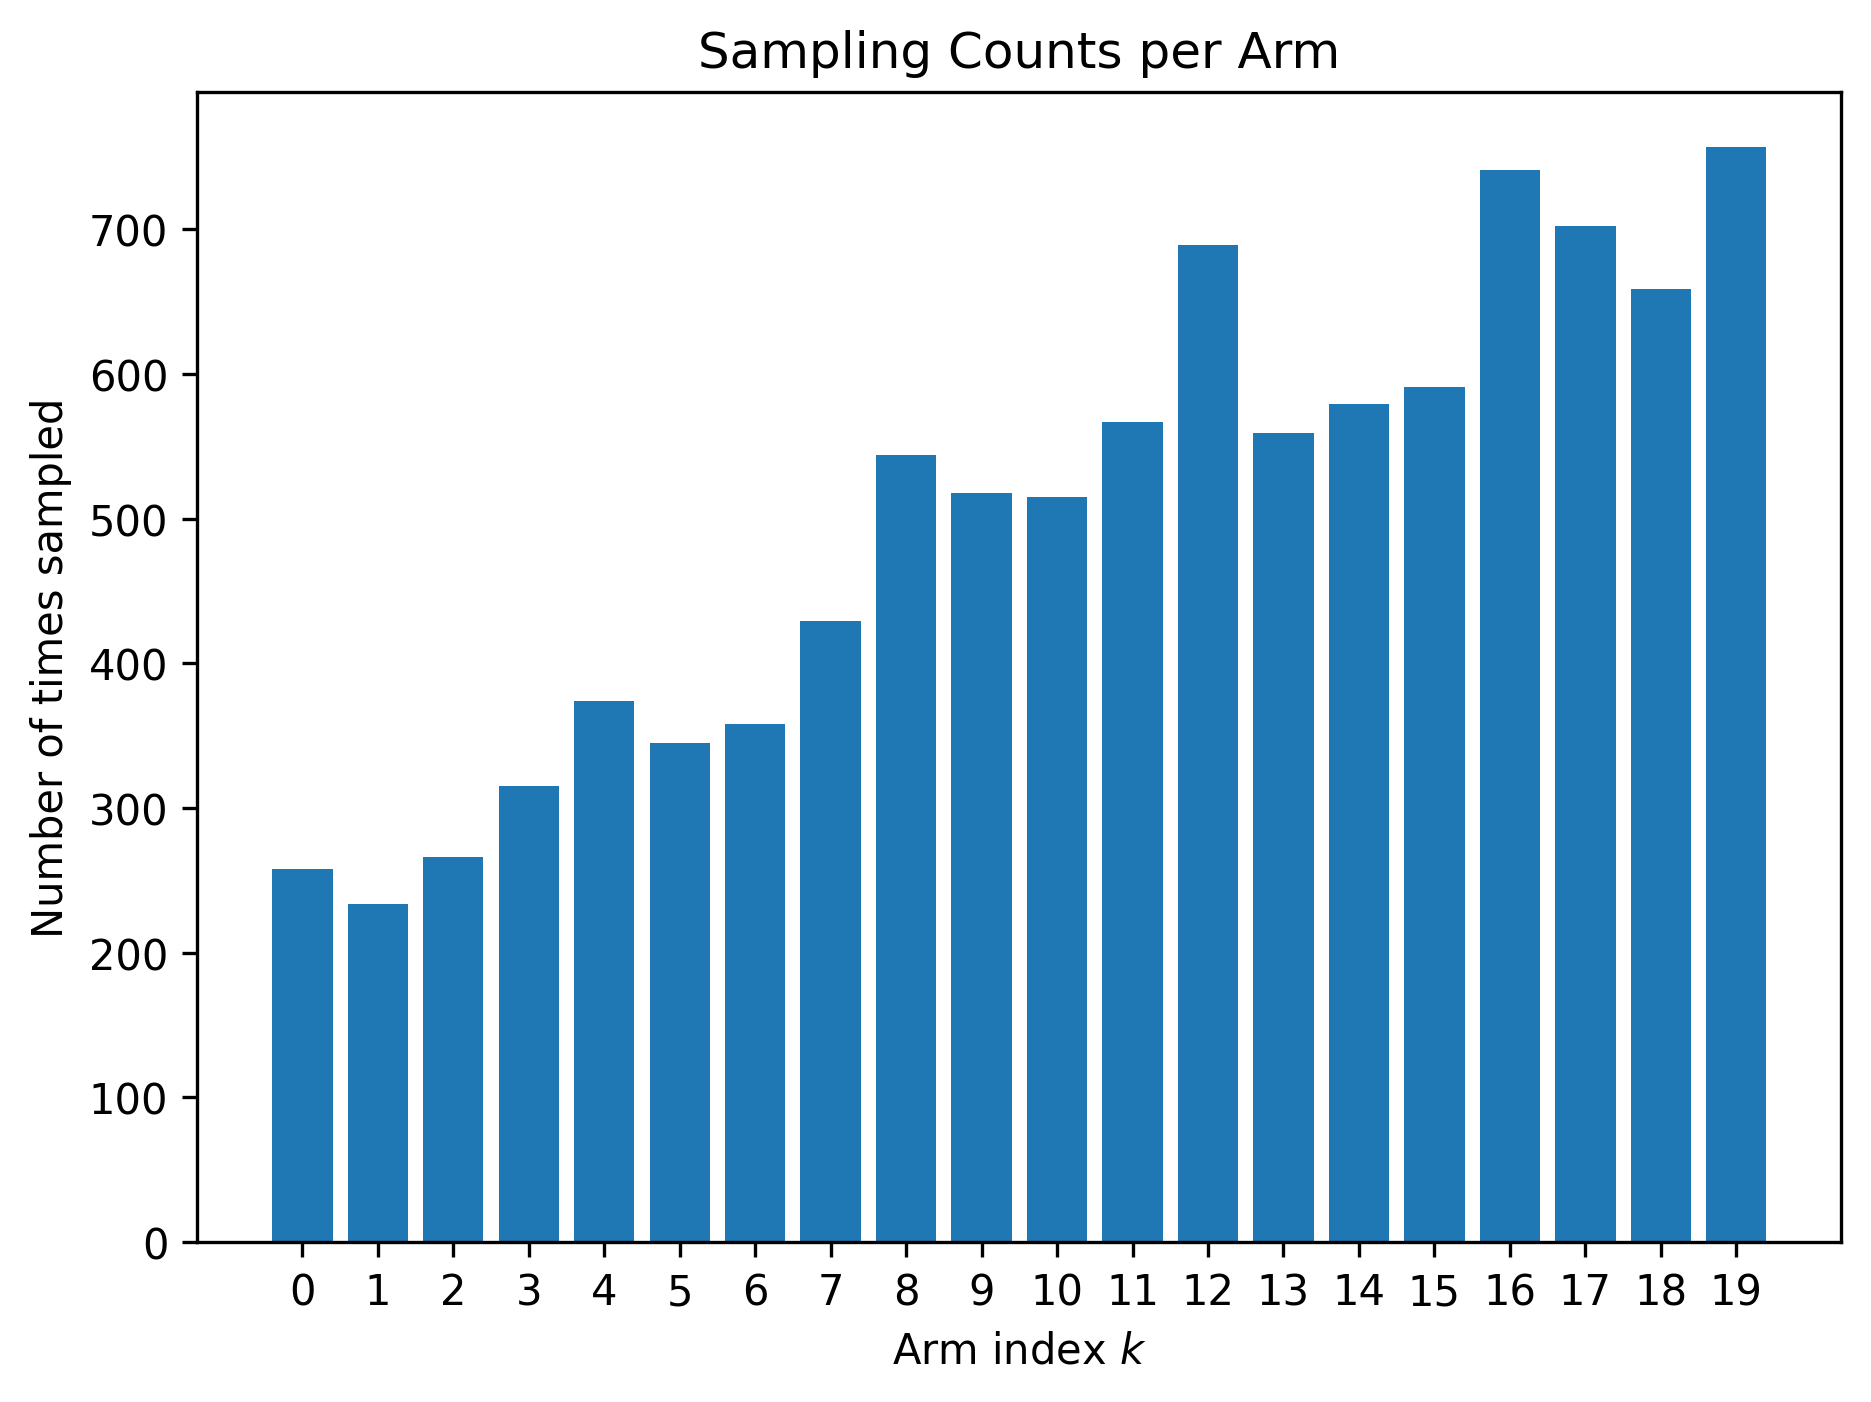

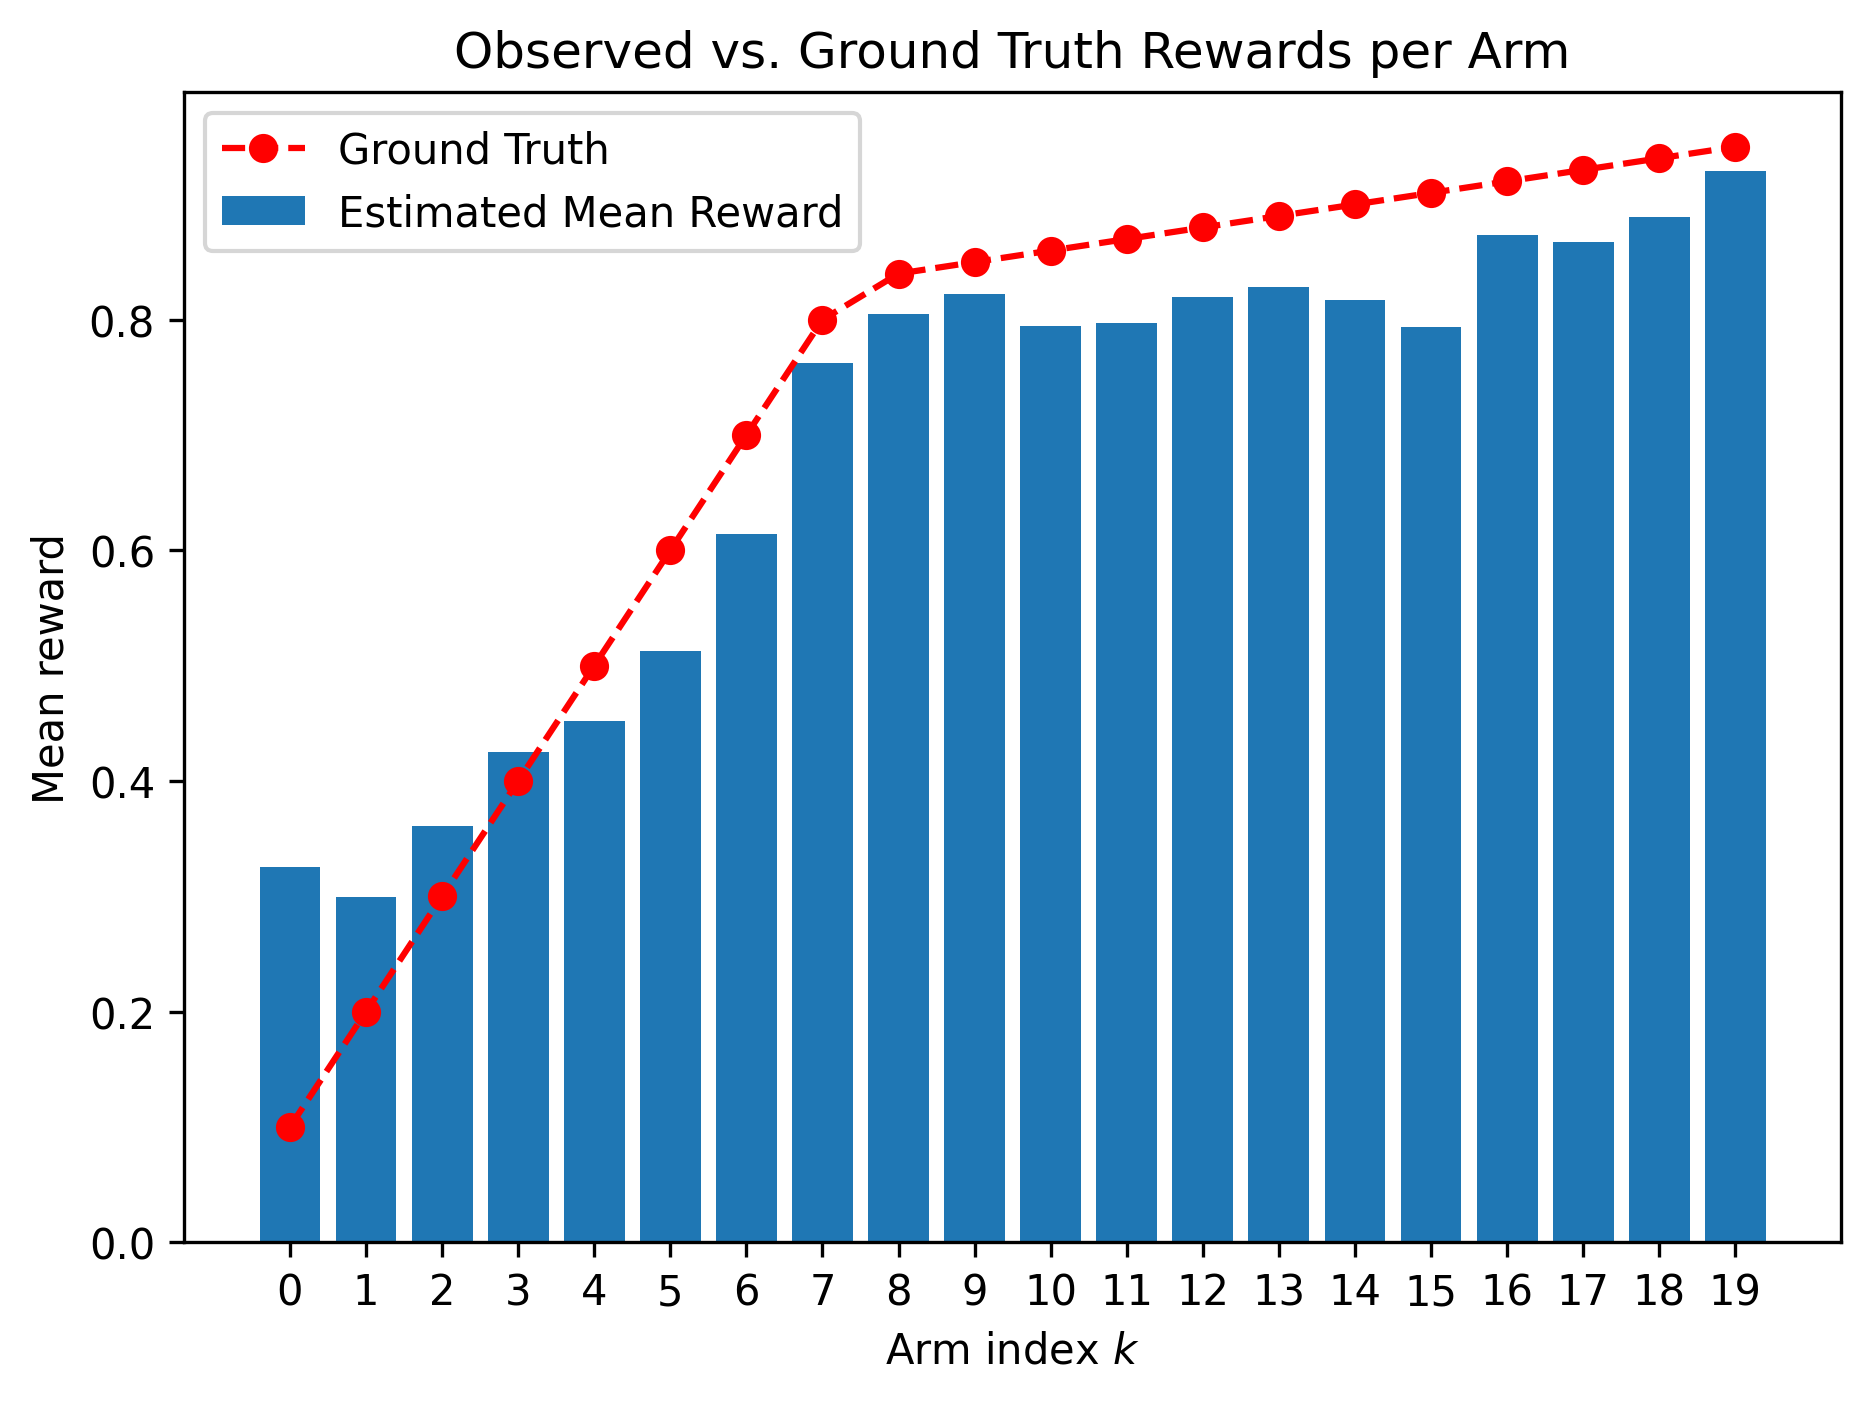

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# ===== 1. Load data =====
traj = np.load('traj_20_generated_seq_transformer.npy')          # 形状 (N, D, 2)
actions = traj[..., 0].astype(int)   # (N, D) — actions a_t
rewards = traj[..., 1]               # (N, D) — rewards r_t

# ===== 2. Determine number of arms =====
K = actions.max() + 1                # assume arms are 0-indexed

# ===== 3. Figure 1: Sampling counts per arm =====
counts = np.bincount(actions.flatten(), minlength=K)

plt.figure()
plt.bar(range(K), counts)
plt.xlabel('Arm index $k$')
plt.ylabel('Number of times sampled')
plt.title('Sampling Counts per Arm')
plt.tight_layout()
plt.xticks(range(0,20))
plt.gcf().set_dpi(300)
plt.show()

# ===== 4. Figure 2: Mean observed reward per arm & Ground Truth =====
mean_reward_per_arm = []
for k in range(K):
    mask = (actions == k)
    if mask.any():
        mean_reward_per_arm.append(rewards[mask].mean())
    else:
        mean_reward_per_arm.append(np.nan)

theta_oracled = np.array([
    0.1, 0.2, 0.3, 0.4, 0.5,
    0.6, 0.7, 0.8, 0.84, 0.85,
    0.86, 0.87, 0.88, 0.89, 0.9,
    0.91, 0.92, 0.93, 0.94, 0.95
])

x = np.arange(K)
plt.figure()
plt.bar(x, mean_reward_per_arm, label='Estimated Mean Reward')
plt.plot(x, theta_oracled, marker='o', linestyle='--', color='r', label='Ground Truth')
plt.xlabel('Arm index $k$')
plt.ylabel('Mean reward')
plt.title('Observed vs. Ground Truth Rewards per Arm')
plt.legend()
plt.tight_layout()
plt.xticks(range(0,20))
plt.gcf().set_dpi(300)
plt.show()